In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split
import os
import numpy as np

In [2]:
save_path = '../input/aptos-data-split/'  # 保存最后csv数据文件的目录

root_dir_2015 = os.path.join('../input/diabetic-retinopathy-resized/')  # csv数据文件原目录
train_2015 = '../input/diabetic-retinopathy-resized/resized_train/ben_preprocessing_sigmaX10/'  # 图片文件目录

root_dir_2019 = os.path.join('../input/aptos2019-blindness-detection/')  # csv数据文件原目录
train_2019 = '../input/aptos2019-blindness-detection/train_images/train_images_ben_preprocessing_sigmaX10/'  # 图片文件目录

test_2019 = '../input/aptos2019-blindness-detection/test_images/'
n_splits = 5  # 分折数

In [3]:
# 划分2015数据集
df_2015 = pd.read_csv(root_dir_2015+'trainLabels.csv')

# 增加path字段
df_2015['path'] = df_2015['image'].map(lambda x: os.path.join(train_2015, '{}.jpeg'.format(x)))  # 合并图片地址并增加path字段

# 预留测试集
print('Processing 2015 data(hold-out)...')
X_train, X_test, y_train, y_test = train_test_split(df_2015['image'], df_2015['level'], test_size=0.2, random_state=64)  # 保留20%的样本作为测试集
# df_2015['image']
val_idx = df_2015['image'].isin(X_test)  # 检查哪些被选为测试集
is_valid = np.zeros(len(df_2015), dtype=bool)
is_valid[val_idx] = True  # 将其标记为True
df_2015['is_valid'] = is_valid

# 5分折（为交叉验证作准备）
print('Processing 2015 data(5-fold)...')
skf1 = StratifiedKFold(n_splits=n_splits, random_state=0)
group = df_2015.groupby('is_valid')
for item in group:
    X15 = item[1]['image']  # 样本
    y15 = item[1]['level']  # 标签
    c1 = 0
    
    for train_idx1, val_idx1 in skf1.split(X15, y15):
        print(len(val_idx1))
        c1+=1
        df_2015.loc[X15.index[train_idx1], 'is_valid'+str(c1)] = False
        df_2015.loc[X15.index[val_idx1], 'is_valid'+str(c1)] = True

# 保存数据
df_2015.to_csv(save_path+'df_2015_cv.csv')

# 查看分布图
print("Distribution of 2015 Train/Valid\n")
print(df_2015.groupby("is_valid")["level"].value_counts("True"))
print(df_2015.groupby("is_valid")["level"].value_counts())
df_2015.groupby("is_valid")["level"].value_counts("True").plot(kind="bar")

Processing 2015 data(hold-out)...
Processing 2015 data(5-fold)...
5621
5621
5620
5619
5619
1407
1407
1407
1403
1402
Distribution of 2015 Train/Valid

is_valid  level
False     0        0.731744
          2        0.152242
          1        0.071530
          3        0.024733
          4        0.019751
True      0        0.746940
          2        0.144321
          1        0.061628
          3        0.025334
          4        0.021776
Name: level, dtype: float64
is_valid  level
False     0        20562
          2         4278
          1         2010
          3          695
          4          555
True      0         5248
          2         1014
          1          433
          3          178
          4          153
Name: level, dtype: int64


Processing 2019 data(hold-out)...
Processing 2019 data(5-fold)...
588
588
585
584
584
149
147
147
145
145
Distribution of 2019 Train/Valid

is_valid  diagnosis
False     0            0.490611
          2            0.274155
          1            0.100717
          4            0.079208
          3            0.055309
True      0            0.502046
          2            0.267394
          1            0.102319
          4            0.085948
          3            0.042292
Name: diagnosis, dtype: float64
is_valid  diagnosis
False     0            1437
          2             803
          1             295
          4             232
          3             162
True      0             368
          2             196
          1              75
          4              63
          3              31
Name: diagnosis, dtype: int64


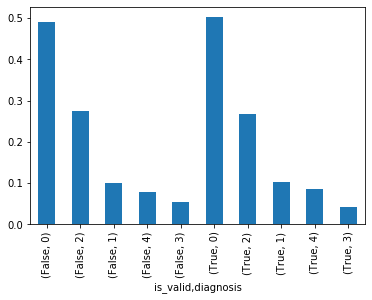

In [4]:
# 划分2019数据集
df_2019 = pd.read_csv(root_dir_2019+'train.csv')

# 增加path字段
df_2019['path'] = df_2019['id_code'].map(lambda x: os.path.join(train_2019, '{}.png'.format(x)))  # 合并图片地址并增加path字段

# 预留测试集
print('Processing 2019 data(hold-out)...')
X_train, X_test, y_train, y_test = train_test_split(df_2019['id_code'], df_2019['diagnosis'], test_size=0.2, random_state=64)  # 保留20%的样本作为测试集
# df_2019['id_code']
val_idx = df_2019['id_code'].isin(X_test)  # 检查哪些被选为测试集
is_valid = np.zeros(len(df_2019), dtype=bool)
is_valid[val_idx] = True  # 将其标记为True
df_2019['is_valid'] = is_valid

# 5分折（为交叉验证作准备）
print('Processing 2019 data(5-fold)...')
skf2 = StratifiedKFold(n_splits=n_splits, random_state=0)
group = df_2019.groupby('is_valid')
for item in group:
    X19 = item[1]['id_code']
    y19 = item[1]['diagnosis']
    c2 = 0
    
    for train_idx2, val_idx2 in skf2.split(X19, y19):
        print(len(val_idx2))
        c2+=1
        df_2019.loc[X19.index[train_idx2], 'is_valid'+str(c2)] = False
        df_2019.loc[X19.index[val_idx2], 'is_valid'+str(c2)] = True

# 保存数据
df_2019.to_csv(save_path+'df_2019_cv.csv')

# 查看分布图
print("Distribution of 2019 Train/Valid\n")
print(df_2019.groupby("is_valid")["diagnosis"].value_counts("True"))
print(df_2019.groupby("is_valid")["diagnosis"].value_counts())
df_2019.groupby("is_valid")["diagnosis"].value_counts("True").plot(kind="bar")